## Загрузка библиотек

In [10]:
import pandas as pd
from lets_plot import *
#LetsPlot.setup_html()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv)
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    #X = df.loc[:, df.columns!='target']
    X = df #оставим тут target, потому что дальше будем удалять часть строк, и не хочется, чтобы они все перепутались
    y = df['target']
    return X, y

In [3]:
COVID_DATA_PATH = 'covid.csv'
HR_DATA_PATH = 'hr.csv'

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

In [5]:
X_covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [6]:
X_hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
y_hr.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1. (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

##### Числовые признаки: city_development_index, training_hours

In [8]:
display(X_hr.describe())

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [12]:
ggplot(X_hr, aes(x='city_development_index')) + geom_histogram(color="darkblue", fill="lightblue") + ggsize(500, 250)

In [11]:
ggplot(X_hr, aes(x='training_hours')) + geom_histogram(color="darkblue", fill="lightblue") + ggsize(500, 250)

##### Категориальные признаки

In [13]:
Cat_att = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 
            'experience', 'company_size', 'company_type', 'last_new_job']

In [14]:
cnt = X_hr.apply(lambda x: x.value_counts()).T.stack()

for att in Cat_att:
    print('\033[1m' + att.upper())
    display(cnt[att])
    plo = ggplot(X_hr, aes(x=att)) + geom_bar(color="darkblue", fill="lightblue") + ggsize(500, 250)
    display(plo)
    print()

CITY


city_1       26.0
city_10      86.0
city_100    275.0
city_101     75.0
city_102    304.0
            ...  
city_93      26.0
city_94      26.0
city_97     104.0
city_98      79.0
city_99      94.0
Length: 123, dtype: float64


GENDER


Female     1238.0
Male      13221.0
Other       191.0
dtype: float64


RELEVENT_EXPERIENCE


Has relevent experience    13792.0
No relevent experience      5366.0
dtype: float64


ENROLLED_UNIVERSITY


Full time course     3757.0
Part time course     1198.0
no_enrollment       13817.0
dtype: float64


EDUCATION_LEVEL


Graduate          11598.0
High School        2017.0
Masters            4361.0
Phd                 414.0
Primary School      308.0
dtype: float64


MAJOR_DISCIPLINE


Arts                 253.0
Business Degree      327.0
Humanities           669.0
No Major             223.0
Other                381.0
STEM               14492.0
dtype: float64


EXPERIENCE


1       549.0
10      985.0
11      664.0
12      494.0
13      399.0
14      586.0
15      686.0
16      508.0
17      342.0
18      280.0
19      304.0
2      1127.0
20      148.0
3      1354.0
4      1403.0
5      1430.0
6      1216.0
7      1028.0
8       802.0
9       980.0
<1      522.0
>20    3286.0
dtype: float64


COMPANY_SIZE


10/49        1471.0
100-500      2571.0
1000-4999    1328.0
10000+       2019.0
50-99        3083.0
500-999       877.0
5000-9999     563.0
<10          1308.0
dtype: float64


COMPANY_TYPE


Early Stage Startup     603.0
Funded Startup         1001.0
NGO                     521.0
Other                   121.0
Public Sector           955.0
Pvt Ltd                9817.0
dtype: float64


LAST_NEW_JOB


1        8040.0
2        2900.0
3        1024.0
4        1029.0
>4       3290.0
never    2452.0
dtype: float64

In [15]:
y_hr.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

#### 2. (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [16]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [17]:
X_hr_dropna = X_hr.dropna()

In [18]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')

Pазмер датасета hr без NaN 8955


In [19]:
X_hr_dropna.describe()

,enrollee_id,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000,8955.000000
mean,16869.638749,0.844570,65.074930,0.165606
std,9963.804718,0.116178,60.235087,0.371747
min,2.000000,0.448000,1.000000,0.000000
25%,8150.000000,0.794000,23.000000,0.000000
50%,16924.000000,0.910000,47.000000,0.000000
75%,25902.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [20]:
X_hr.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Ниже гистограммы накладываются одна на другую, чтобы было видно, насколько упало число элементов при удалении NaN

In [21]:
X_join = pd.concat([X_hr_dropna, X_hr], keys = [ 'with dropna', 'without dropna'], names = ['series name'])
X_join['which'] = np.array(list(X_join.index))[:, 0]
ggplot(X_join, aes(x='city_development_index', fill = 'which')) + geom_histogram(position = "identity", color="black") + ggsize(600, 250)

In [22]:
ggplot(X_join, aes(x='training_hours', fill = 'which')) + geom_histogram(position = "identity", color="black") + ggsize(600, 250)

In [23]:
cnt_drop = X_hr_dropna.apply(lambda x: x.value_counts()).T.stack()#[['city', 'gender', 'relevent_experience', 'enrolled_university']]
for att in Cat_att:
    print('\033[1m' + att.upper())
    cnt_ = pd.concat([cnt[att], cnt_drop[att]], keys = [ 'without dropna', 'with dropna', ], axis =1)
    display(cnt_)
    plo = ggplot(X_join, aes(x=att, fill = 'which')) + geom_bar(position = "identity", color="black") + ggsize(600, 250)
    display(plo)
    print()

CITY


,without dropna,with dropna
city_1,26.0,13.0
city_10,86.0,52.0
city_100,275.0,82.0
city_101,75.0,24.0
city_102,304.0,126.0
...,...,...
city_93,26.0,10.0
city_94,26.0,10.0
city_97,104.0,50.0
city_98,79.0,41.0



GENDER


,without dropna,with dropna
Female,1238.0,804.0
Male,13221.0,8073.0
Other,191.0,78.0



RELEVENT_EXPERIENCE


,without dropna,with dropna
Has relevent experience,13792.0,7851.0
No relevent experience,5366.0,1104.0



ENROLLED_UNIVERSITY


,without dropna,with dropna
Full time course,3757.0,832.0
Part time course,1198.0,529.0
no_enrollment,13817.0,7594.0



EDUCATION_LEVEL


,without dropna,with dropna
Graduate,11598.0,6252.0
High School,2017.0,NaN
Masters,4361.0,2449.0
Phd,414.0,254.0
Primary School,308.0,NaN



MAJOR_DISCIPLINE


,without dropna,with dropna
Arts,253.0,129.0
Business Degree,327.0,170.0
Humanities,669.0,378.0
No Major,223.0,112.0
Other,381.0,177.0
STEM,14492.0,7989.0



EXPERIENCE


,without dropna,with dropna
1,549.0,121.0
10,985.0,551.0
11,664.0,372.0
12,494.0,293.0
13,399.0,235.0
14,586.0,333.0
15,686.0,398.0
16,508.0,304.0
17,342.0,206.0
18,280.0,168.0



COMPANY_SIZE


,without dropna,with dropna
10/49,1471.0,951.0
100-500,2571.0,1814.0
1000-4999,1328.0,930.0
10000+,2019.0,1449.0
50-99,3083.0,1986.0
500-999,877.0,592.0
5000-9999,563.0,393.0
<10,1308.0,840.0



COMPANY_TYPE


,without dropna,with dropna
Early Stage Startup,603.0,385.0
Funded Startup,1001.0,784.0
NGO,521.0,356.0
Other,121.0,72.0
Public Sector,955.0,564.0
Pvt Ltd,9817.0,6794.0



LAST_NEW_JOB


,without dropna,with dropna
1,8040.0,3838.0
2,2900.0,1570.0
3,1024.0,610.0
4,1029.0,599.0
>4,3290.0,1965.0
never,2452.0,373.0


Видно, что удалилось много строк, из-за этого изменились статистики (например, совсем пропали люди с education level 'high school' и 'primary school'. И в целом удалилось больше половины строк. Грустно терять такое количество статистики

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [24]:
X_hr[X_hr['city_development_index'].isna()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [25]:
X_hr[X_hr['training_hours'].isna()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


Как видно, в числовых признаков пропусков нет

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [26]:
def cnt_missing_values(X_hr):
    X_hr_cnt = X_hr.copy()

    for col in X_hr_cnt.columns:
        missing = X_hr_cnt[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:  
            X_hr_cnt['{}_ismissing'.format(col)] = missing

    # затем на основе индикатора строим гистограмму
    ismissing_cols = [col for col in X_hr_cnt.columns if 'ismissing' in col]
    X_hr_cnt['num_missing'] = X_hr_cnt[ismissing_cols].sum(axis=1)

    f = ggplot(X_hr_cnt, aes(x='num_missing')) + geom_bar(color="darkblue", fill="lightblue") + ggsize(500, 250) +ggtitle("Распределение числа пропущенных данных в строке")
    display(f)
    return X_hr_cnt

In [27]:
X_hr_cnt = cnt_missing_values(X_hr)

Число строк, в которых Nan значений 3-7: 1953+628+176+62+12=2831, 2831/19158 = 14.8% < 15%, значит их можно удалить

In [28]:
X_hr = X_hr_cnt[X_hr_cnt.num_missing < 3].drop(columns = X_hr_cnt.columns[np.arange(14, 23, 1)],axis=1)
y_hr = X_hr['target']
_ = cnt_missing_values(X_hr)

In [29]:
miss = pd.DataFrame(X_hr[Cat_att].isnull().mean().sort_values() * 100, columns = ['% пропущенных значений'])
miss

,% пропущенных значений
city,0.000000
relevent_experience,0.000000
experience,0.128621
education_level,0.453237
enrolled_university,0.771728
last_new_job,0.900349
major_discipline,6.639309
gender,17.314877
company_size,20.107797
company_type,21.216390


In [30]:
y_hr[y_hr.isnull()] #у у нет пропущенных значений

Series([], Name: target, dtype: float64)

Мне кажется, что в строках с небольшим процентом пропущенных значений (<1%) можно заполнить NaN наиболее часто встречающимся значением, так как в любом случае общее распределение поменяется не сильно. Если же % пропущенных значений составляет ~10-20%, то замена всех Nan на наиболее частое способно сильно изменить распределение. Поэтому 

In [31]:
#офтоп как найти наиболее часто встречающееся значение - оно в top
X_hr[Cat_att[0]].describe()

count        16327
unique         123
top       city_103
freq          3880
Name: city, dtype: object

In [33]:
X_hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [34]:
def fill_na(X, y):
    X_fill = X.copy()
    for att in miss[miss['% пропущенных значений']>1].index:
        X_fill = X_fill.fillna({att: att+"_not_stated"})
    for att in miss[miss['% пропущенных значений']<=1].index:
        X_fill = X_fill.fillna({att: X_hr[att].describe()['top']})
    y_fill = X_fill['target']
    return X_fill, y_fill

In [35]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [36]:
cnt_fill = X_hr_fill.apply(lambda x: x.value_counts()).T.stack()#[['city', 'gender', 'relevent_experience', 'enrolled_university']]
for att in Cat_att:
    print('\033[1m' + att.upper())
    cnt_ = pd.concat([cnt[att], cnt_fill[att]], keys = [ 'not fill', 'fill'], axis =1)
    display(cnt_)
    X_join_fill = pd.concat([X_hr_fill, X_hr], keys = ['fill', 'not fill',], names = ['series name'])
    X_join_fill['which'] = np.array(list(X_join_fill.index))[:, 0]

    plo = ggplot(X_join_fill, aes(x=att, fill = 'which')) + geom_bar(position = "identity", color="black", alpha = 0.5) + ggsize(600, 250)

    display(plo)
    print()

CITY


,not fill,fill
city_1,26.0,25.0
city_10,86.0,76.0
city_100,275.0,215.0
city_101,75.0,62.0
city_102,304.0,259.0
...,...,...
city_93,26.0,25.0
city_94,26.0,21.0
city_97,104.0,94.0
city_98,79.0,74.0



GENDER


,not fill,fill
Female,1238.0,1180.0
Male,13221.0,12156.0
Other,191.0,164.0
gender_not_stated,NaN,2827.0



RELEVENT_EXPERIENCE


,not fill,fill
Has relevent experience,13792.0,12890.0
No relevent experience,5366.0,3437.0



ENROLLED_UNIVERSITY


,not fill,fill
Full time course,3757.0,2686.0
Part time course,1198.0,1052.0
no_enrollment,13817.0,12589.0



EDUCATION_LEVEL


,not fill,fill
Graduate,11598.0,10836.0
High School,2017.0,912.0
Masters,4361.0,4102.0
Phd,414.0,394.0
Primary School,308.0,83.0



MAJOR_DISCIPLINE


,not fill,fill
Arts,253.0,240.0
Business Degree,327.0,297.0
Humanities,669.0,631.0
No Major,223.0,206.0
Other,381.0,348.0
STEM,14492.0,13521.0
major_discipline_not_stated,NaN,1084.0



EXPERIENCE


,not fill,fill
1,549.0,363.0
10,985.0,906.0
11,664.0,615.0
12,494.0,455.0
13,399.0,376.0
14,586.0,558.0
15,686.0,650.0
16,508.0,477.0
17,342.0,320.0
18,280.0,257.0



COMPANY_SIZE


,not fill,fill
10/49,1471.0,1443.0
100-500,2571.0,2531.0
1000-4999,1328.0,1314.0
10000+,2019.0,2008.0
50-99,3083.0,3046.0
500-999,877.0,869.0
5000-9999,563.0,553.0
<10,1308.0,1280.0
company_size_not_stated,NaN,3283.0



COMPANY_TYPE


,not fill,fill
Early Stage Startup,603.0,589.0
Funded Startup,1001.0,997.0
NGO,521.0,514.0
Other,121.0,120.0
Public Sector,955.0,937.0
Pvt Ltd,9817.0,9706.0
company_type_not_stated,NaN,3464.0



LAST_NEW_JOB


,not fill,fill
1,8040.0,7295.0
2,2900.0,2694.0
3,1024.0,968.0
4,1029.0,971.0
>4,3290.0,3098.0
never,2452.0,1301.0


Видно, что статистика поменялась не сильно.

### Задание 3  (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [33]:
X_covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [34]:
country_cnt_datas = X_covid.groupby('country').count()['date']
country_cnt_datas[country_cnt_datas==46]

country
Bahrain    46
Name: date, dtype: int64

Bahrain

In [35]:
#т.к.нужны только колонки date и total_vaccinations, остальное выкидываем
X_covid_bahrain = X_covid[X_covid['country']=='Bahrain'][['date','total_vaccinations']]
X_covid_bahrain.head()

,date,total_vaccinations
78,2020-12-23,38965.0
79,2020-12-24,50071.0
80,2020-12-25,50543.0
81,2020-12-26,51556.0
82,2020-12-27,53614.0


In [36]:
ggplot(X_covid_bahrain, aes(x='date', y='total_vaccinations')) + geom_point() + geom_line()

In [37]:
#ищем missing values
X_covid_bahrain[X_covid_bahrain['total_vaccinations'].isna()]

,date,total_vaccinations
107,2021-01-21,NaN
108,2021-01-22,NaN
109,2021-01-23,NaN
110,2021-01-24,NaN
111,2021-01-25,NaN


Из графика видно, что пропущенные значения начинаются после небольшого "плато", поэтому линейный рост числа вацинированных, как мне кажется, должен выглядеть адекватно

In [38]:
ind = X_covid_bahrain[X_covid_bahrain['total_vaccinations'].isna()].index
b = X_covid_bahrain.loc[ind[0]-1]['total_vaccinations']
e = X_covid_bahrain.loc[ind[-1]+1]['total_vaccinations']
X_covid_bahrain.loc[ind, 'total_vaccinations'] = np.linspace(b, e, len(ind) + 2)[1:-1]

In [39]:
ggplot(X_covid_bahrain, aes(x='date', y='total_vaccinations')) + geom_point() + geom_line()

### Задание  4 (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [37]:
display(X_hr_fill['city_development_index'].describe())
display(ggplot(X_hr_fill, aes(y ='city_development_index')) + geom_boxplot() + ggsize(500, 250) )
display(ggplot(X_hr_fill, aes(x='city_development_index')) + geom_histogram() + ggsize(500, 250))

count    16327.000000
mean         0.834186
std          0.120672
min          0.448000
25%          0.754000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [38]:
display(X_hr_fill['training_hours'].describe())
display(ggplot(X_hr_fill, aes(y ='training_hours')) + geom_boxplot() + ggsize(500, 250))
display(ggplot(X_hr_fill, aes(x='training_hours')) + geom_histogram() + ggsize(500, 250))

count    16327.000000
mean        65.324432
std         60.179074
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

Мне кажется, что выбросов нет

### Задание  5 (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


Признаки, у которых есть ранжирование: relevent_experience, enrolled_university, education_level, experience, company_size, last_new_job.
Нет ранжирования: city, gender, major_discipline, company_type

Признаки с рандированием можно сделать label encoding. C остальными - one hot encoding или frequency encoding. 
При one hot encoding создается много столбцов (для каждого из вариантов значений признака), поэтому делать его для признака с большим количеством вариантов значений не очень хорошо. Такой признак - city - к нему будет применен frequency encoding

итог: 
relevent_experience, enrolled_university, education_level, experience, company_size, last_new_job -> label 

city -> frequency

gender, major_discipline, company_type -> one-hot 

In [39]:
len(X_hr)

16327

In [40]:
len(y_hr)

16327

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
def encode(X):
    #Возвращает данные без категориальных признаков
    
    #label encoding
    X_encode = X.copy()
    
    #label
    tolabel = ['relevent_experience', 'enrolled_university', 'education_level', 'experience', 'company_size', 'last_new_job']
    
    #задаем правильный порядок
    sorter = [['No relevent experience', 'Has relevent experience'],
              ['no_enrollment', 'Part time course', 'Full time course'], 
              ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
              np.concatenate((['<1'], [str(i) for i in range(1, 21)], ['>20'])), 
              ['<10', '10/49', '50-99',  '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
              ['never', '1', '2', '3', '4', '>4']]
    
    for i in range(len(tolabel)):
        X_encode[tolabel[i]] = X_encode[tolabel[i]].astype("category")
        X_encode[tolabel[i]].cat.set_categories(sorter[i], inplace = True)
        X_encode = X_encode.sort_values(tolabel[i])
        X_encode[tolabel[i]] = X_encode[tolabel[i]].cat.codes
    
    #frequency
    enc_city = X_encode.groupby('city').size() / len(X_encode)
    X_encode['city'] = X_encode['city'].apply(lambda x : enc_city[x])

    #one-hot
    toonehot = ['gender', 'major_discipline', 'company_type']
    
    for att in toonehot:
        df2=pd.get_dummies(X_encode[[att]])
        X_encode=pd.concat([X_encode,df2],axis=1).drop(columns = att)

    
    return X_encode

In [43]:
X_hr_encode = encode(X_hr_fill)

#удаляем из X столбец target, теперь уже точно в датасете ничего менять не будем
y_hr_fill = X_hr_encode['target']
#X_hr_encode = X_hr_encode.loc[:, X_hr_encode.columns!='target']

In [44]:
X_hr_encode

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,major_discipline_Other,major_discipline_STEM,major_discipline_major_discipline_not_stated,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_company_type_not_stated
7897,16572,0.134807,0.624,1,2,3,4,2,0,42,...,0,1,0,0,0,0,0,0,1,0
11813,26574,0.003797,0.558,0,2,2,3,-1,0,24,...,0,1,0,0,0,0,0,0,0,1
2797,29761,0.045324,0.920,0,2,2,3,-1,0,13,...,1,0,0,0,0,0,0,0,0,1
14497,30133,0.134807,0.624,0,2,2,3,-1,0,44,...,0,1,0,0,0,0,0,0,0,1
6873,7927,0.006125,0.890,1,0,3,8,3,0,38,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14229,19901,0.045324,0.920,1,0,2,19,6,5,37,...,0,1,0,0,0,0,0,0,1,0
18397,30026,0.237643,0.920,1,0,3,21,6,5,86,...,0,1,0,0,0,0,0,0,1,0
3707,11657,0.237643,0.920,1,0,2,21,6,5,4,...,0,1,0,0,0,0,0,0,1,0
2587,27061,0.237643,0.920,1,0,2,13,2,5,31,...,0,1,0,0,0,0,0,0,1,0


### Задание  5 (1 балл)
Выполните задание для датасета _hr_.




#### 1.  (1 балл)
Реализуйте функцию undersampling

#### 2.  (1 балл)
Реализуйте функцию oversampling

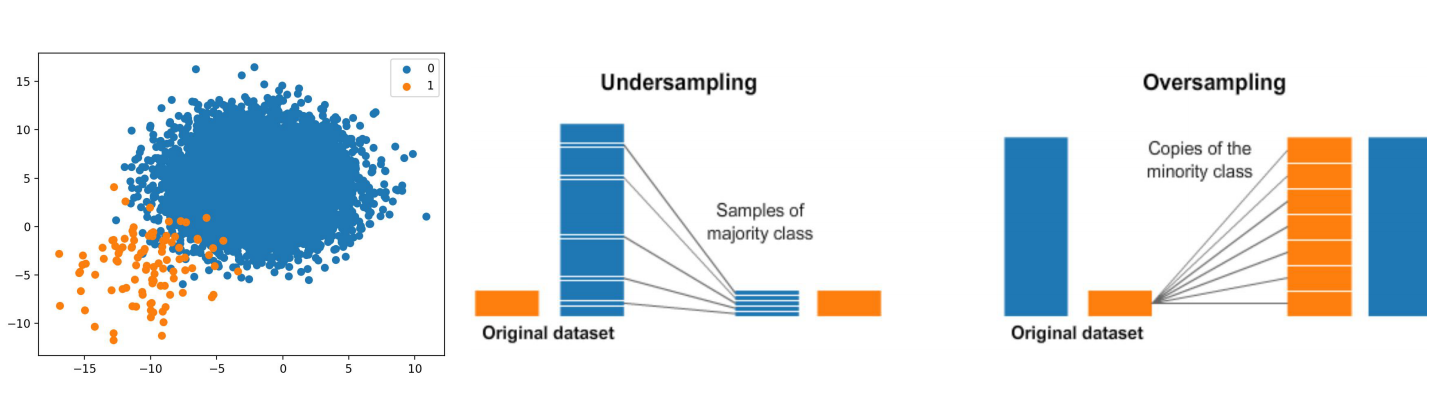

count    16327.000000
mean         0.231641
std          0.421894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

<AxesSubplot:title={'center':'Count (target)'}>

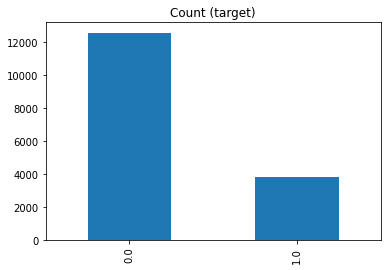

In [45]:
display(y_hr_fill.describe())
y_hr_fill.value_counts().plot(kind='bar', title='Count (target)')

Видно, что 0 больше, чем 1, т.е. датасет несбалансированный

In [46]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    cnt0, cnt1 = X['target'].value_counts()

    X0 = X[X['target'] == 0]
    X1 = X[X['target'] == 1]

    X0_under = X0.sample(cnt1)
    X_under = pd.concat([X0_under, X1], axis=0)
    y_under = X_under['target']
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом oversampling
    
    cnt0, cnt1 = X['target'].value_counts()

    X0 = X[X['target'] == 0]
    X1 = X[X['target'] == 1]
    
    X1_over = X1.sample(cnt0, replace=True)
    X_over = pd.concat([X0, X1_over], axis=0)
    y_over = X_over['target']
    
    return X_over, y_over

In [47]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

UNDER


count    7564.000000
mean        0.500000
std         0.500033
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: target, dtype: float64


OVER


count    25090.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: target, dtype: float64

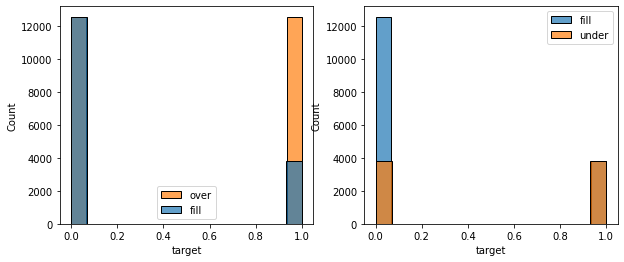

In [48]:
print('\033[1m'+'UNDER')
display(y_hr_under.describe())
print('\n' + '\033[1m'+'OVER')
display(y_hr_over.describe())

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.histplot(y_hr_over, ax = ax[0], color = 'tab:orange', alpha = 0.7, label = 'over')
sns.histplot(y_hr_fill, ax = ax[0], color = 'tab:blue', alpha = 0.7, label = 'fill')


sns.histplot(y_hr_fill, ax = ax[1], color = 'tab:blue', alpha = 0.7, label = 'fill')
sns.histplot(y_hr_under,ax = ax[1], color = 'tab:orange',  alpha = 0.7, label = 'under')

ax[0].legend()
ax[1].legend()

#### 3.  (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

SMOTE


count    25090.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='Count'>

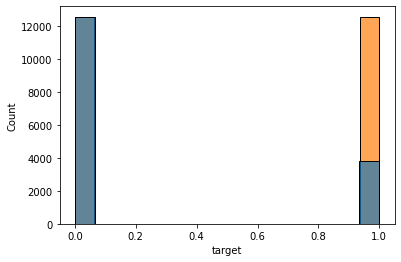

In [50]:
print('\033[1m'+'SMOTE')
display(y_hr_SMOTE.describe())

sns.histplot(y_hr_SMOTE, color = 'tab:orange', alpha = 0.7, label = 'smote')
sns.histplot(y_hr_fill,  color = 'tab:blue', alpha = 0.7, label = 'fill')


#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [51]:
def plt_b(X, Xb, order=0):
    if order == 0:
        X_join = pd.concat([X, Xb], keys = ['not balance', 'balance'], names = ['series name'])
    else:
        X_join = pd.concat([Xb, X], keys = ['balance', 'not balance'], names = ['series name'])

    X_join['which'] = np.array(list(X_join.index))[:, 0]
    for x in X.columns[1:]:
        print('\033[1m' + x.upper())

        display(pd.concat((X_join[X_join['which']=='not balance'][x].describe(), X_join[X_join['which']=='balance'][x].describe()), axis=1, keys = ['not balance', 'balance']))
        display(ggplot(X_join, aes(x=x, fill = 'which')) + geom_histogram(position = "identity", color="black") + ggsize(600, 250))
    '''for x in X.columns:
        display(X[x].describe())
        display(Xb[x].describe())
        sns.histplot(Xb[x], color = 'tab:orange')
        sns.histplot(X[x], color = 'tab:blue')
        plt.show()'''

###### OVER

In [52]:
plt_b(X_hr_encode, X_hr_over)

CITY


,not balance,balance
count,16327.000000,25090.000000
mean,0.092951,0.096601
std,0.091175,0.089040
min,0.000061,0.000061
25%,0.009861,0.010290
50%,0.071170,0.082134
75%,0.134807,0.134807
max,0.237643,0.237643


CITY_DEVELOPMENT_INDEX


,not balance,balance
count,16327.000000,25090.000000
mean,0.834186,0.807000
std,0.120672,0.133999
min,0.448000,0.448000
25%,0.754000,0.624000
50%,0.910000,0.895000
75%,0.920000,0.920000
max,0.949000,0.949000


RELEVENT_EXPERIENCE


,not balance,balance
count,16327.000000,25090.000000
mean,0.789490,0.756078
std,0.407683,0.429455
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


ENROLLED_UNIVERSITY


,not balance,balance
count,16327.000000,25090.000000
mean,0.393459,0.460343
std,0.753465,0.804919
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,2.000000,2.000000


EDUCATION_LEVEL


,not balance,balance
count,16327.000000,25090.000000
mean,2.233478,2.229613
std,0.607841,0.577737
min,0.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,4.000000,4.000000


EXPERIENCE


,not balance,balance
count,16327.000000,25090.000000
mean,10.750781,10.021722
std,6.724132,6.729898
min,0.000000,0.000000
25%,5.000000,4.000000
50%,9.000000,8.000000
75%,17.000000,15.000000
max,21.000000,21.000000


COMPANY_SIZE


,not balance,balance
count,16327.000000,25090.000000
mean,2.404912,2.121004
std,2.599415,2.667458
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,7.000000,7.000000


LAST_NEW_JOB


,not balance,balance
count,16327.000000,25090.000000
mean,2.141300,2.046632
std,1.658507,1.629835
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,5.000000,5.000000


TRAINING_HOURS


,not balance,balance
count,16327.000000,25090.000000
mean,65.324432,64.563970
std,60.179074,59.565363
min,1.000000,1.000000
25%,23.000000,23.000000
50%,47.000000,47.000000
75%,88.000000,87.000000
max,336.000000,336.000000


TARGET


,not balance,balance
count,16327.000000,25090.00000
mean,0.231641,0.50000
std,0.421894,0.50001
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.50000
75%,0.000000,1.00000
max,1.000000,1.00000


GENDER_FEMALE


,not balance,balance
count,16327.000000,25090.000000
mean,0.072273,0.077122
std,0.258947,0.266791
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


GENDER_MALE


,not balance,balance
count,16327.000000,25090.000000
mean,0.744534,0.740056
std,0.436136,0.438612
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


GENDER_OTHER


,not balance,balance
count,16327.000000,25090.000000
mean,0.010045,0.010084
std,0.099722,0.099912
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


GENDER_GENDER_NOT_STATED


,not balance,balance
count,16327.000000,25090.000000
mean,0.173149,0.172738
std,0.378387,0.378028
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_ARTS


,not balance,balance
count,16327.000000,25090.000000
mean,0.014700,0.013153
std,0.120351,0.113931
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_BUSINESS DEGREE


,not balance,balance
count,16327.000000,25090.000000
mean,0.018191,0.018812
std,0.133645,0.135864
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_HUMANITIES


,not balance,balance
count,16327.000000,25090.000000
mean,0.038648,0.036788
std,0.192760,0.188244
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_NO MAJOR


,not balance,balance
count,16327.000000,25090.000000
mean,0.012617,0.013193
std,0.111619,0.114101
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_OTHER


,not balance,balance
count,16327.000000,25090.000000
mean,0.021314,0.021762
std,0.144435,0.145907
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_STEM


,not balance,balance
count,16327.000000,25090.000000
mean,0.828137,0.843165
std,0.377272,0.363653
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_MAJOR_DISCIPLINE_NOT_STATED


,not balance,balance
count,16327.000000,25090.000000
mean,0.066393,0.053129
std,0.248976,0.224295
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_EARLY STAGE STARTUP


,not balance,balance
count,16327.000000,25090.000000
mean,0.036075,0.036947
std,0.186483,0.188635
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_FUNDED STARTUP


,not balance,balance
count,16327.000000,25090.000000
mean,0.061064,0.052770
std,0.239456,0.223578
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_NGO


,not balance,balance
count,16327.000000,25090.000000
mean,0.031482,0.029494
std,0.174621,0.169189
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_OTHER


,not balance,balance
count,16327.000000,25090.000000
mean,0.007350,0.007573
std,0.085418,0.086693
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_PUBLIC SECTOR


,not balance,balance
count,16327.000000,25090.000000
mean,0.057390,0.054364
std,0.232593,0.226740
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_PVT LTD


,not balance,balance
count,16327.000000,25090.00000
mean,0.594475,0.54727
std,0.491008,0.49777
min,0.000000,0.00000
25%,0.000000,0.00000
50%,1.000000,1.00000
75%,1.000000,1.00000
max,1.000000,1.00000


COMPANY_TYPE_COMPANY_TYPE_NOT_STATED


,not balance,balance
count,16327.000000,25090.000000
mean,0.212164,0.271582
std,0.408853,0.444784
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


KeyboardInterrupt: 

###### UNDER

In [53]:
plt_b(X_hr_encode, X_hr_under, order = 1)

CITY


,not balance,balance
count,16327.000000,7564.000000
mean,0.092951,0.096290
std,0.091175,0.088922
min,0.000061,0.000061
25%,0.009861,0.010290
50%,0.071170,0.082134
75%,0.134807,0.134807
max,0.237643,0.237643


CITY_DEVELOPMENT_INDEX


,not balance,balance
count,16327.000000,7564.000000
mean,0.834186,0.806967
std,0.120672,0.133896
min,0.448000,0.448000
25%,0.754000,0.624000
50%,0.910000,0.895000
75%,0.920000,0.920000
max,0.949000,0.949000


RELEVENT_EXPERIENCE


,not balance,balance
count,16327.000000,7564.000000
mean,0.789490,0.756346
std,0.407683,0.429315
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


ENROLLED_UNIVERSITY


,not balance,balance
count,16327.000000,7564.000000
mean,0.393459,0.460603
std,0.753465,0.804034
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,2.000000,2.000000


EDUCATION_LEVEL


,not balance,balance
count,16327.000000,7564.000000
mean,2.233478,2.225145
std,0.607841,0.574432
min,0.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,4.000000,4.000000


EXPERIENCE


,not balance,balance
count,16327.000000,7564.000000
mean,10.750781,9.980434
std,6.724132,6.677544
min,0.000000,0.000000
25%,5.000000,4.000000
50%,9.000000,9.000000
75%,17.000000,15.000000
max,21.000000,21.000000


COMPANY_SIZE


,not balance,balance
count,16327.000000,7564.000000
mean,2.404912,2.132866
std,2.599415,2.677704
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,7.000000,7.000000


LAST_NEW_JOB


,not balance,balance
count,16327.000000,7564.000000
mean,2.141300,2.065706
std,1.658507,1.630252
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,5.000000,5.000000


TRAINING_HOURS


,not balance,balance
count,16327.000000,7564.000000
mean,65.324432,64.625066
std,60.179074,59.718393
min,1.000000,1.000000
25%,23.000000,23.000000
50%,47.000000,47.000000
75%,88.000000,88.000000
max,336.000000,336.000000


TARGET


,not balance,balance
count,16327.000000,7564.000000
mean,0.231641,0.500000
std,0.421894,0.500033
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.500000
75%,0.000000,1.000000
max,1.000000,1.000000


GENDER_FEMALE


,not balance,balance
count,16327.000000,7564.000000
mean,0.072273,0.072184
std,0.258947,0.258809
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


GENDER_MALE


,not balance,balance
count,16327.000000,7564.000000
mean,0.744534,0.740481
std,0.436136,0.438400
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


GENDER_OTHER


,not balance,balance
count,16327.000000,7564.000000
mean,0.010045,0.008858
std,0.099722,0.093704
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


GENDER_GENDER_NOT_STATED


,not balance,balance
count,16327.000000,7564.000000
mean,0.173149,0.178477
std,0.378387,0.382939
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_ARTS


,not balance,balance
count,16327.000000,7564.000000
mean,0.014700,0.012692
std,0.120351,0.111948
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_BUSINESS DEGREE


,not balance,balance
count,16327.000000,7564.000000
mean,0.018191,0.018773
std,0.133645,0.135732
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_HUMANITIES


,not balance,balance
count,16327.000000,7564.000000
mean,0.038648,0.035960
std,0.192760,0.186202
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_NO MAJOR


,not balance,balance
count,16327.000000,7564.000000
mean,0.012617,0.012559
std,0.111619,0.111371
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_OTHER


,not balance,balance
count,16327.000000,7564.000000
mean,0.021314,0.021682
std,0.144435,0.145652
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_STEM


,not balance,balance
count,16327.000000,7564.000000
mean,0.828137,0.846245
std,0.377272,0.360737
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_MAJOR_DISCIPLINE_NOT_STATED


,not balance,balance
count,16327.000000,7564.000000
mean,0.066393,0.052089
std,0.248976,0.222221
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_EARLY STAGE STARTUP


,not balance,balance
count,16327.000000,7564.000000
mean,0.036075,0.034770
std,0.186483,0.183209
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_FUNDED STARTUP


,not balance,balance
count,16327.000000,7564.000000
mean,0.061064,0.049841
std,0.239456,0.217631
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_NGO


,not balance,balance
count,16327.000000,7564.000000
mean,0.031482,0.029085
std,0.174621,0.168056
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_OTHER


,not balance,balance
count,16327.000000,7564.000000
mean,0.007350,0.007536
std,0.085418,0.086486
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_PUBLIC SECTOR


,not balance,balance
count,16327.000000,7564.000000
mean,0.057390,0.057113
std,0.232593,0.232073
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_PVT LTD


,not balance,balance
count,16327.000000,7564.000000
mean,0.594475,0.551824
std,0.491008,0.497340
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


COMPANY_TYPE_COMPANY_TYPE_NOT_STATED


,not balance,balance
count,16327.000000,7564.000000
mean,0.212164,0.269831
std,0.408853,0.443901
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


###### SMOTE

In [196]:
plt_b(X_hr_encode, X_hr_SMOTE)

CITY


,not balance,balance
count,16327.000000,25090.000000
mean,0.092951,0.096775
std,0.091175,0.084575
min,0.000061,0.000061
25%,0.009861,0.014638
50%,0.071170,0.082134
75%,0.134807,0.134807
max,0.237643,0.237643


CITY_DEVELOPMENT_INDEX


,not balance,balance
count,16327.000000,25090.000000
mean,0.834186,0.807538
std,0.120672,0.126804
min,0.448000,0.448000
25%,0.754000,0.684727
50%,0.910000,0.878000
75%,0.920000,0.920000
max,0.949000,0.949000


RELEVENT_EXPERIENCE


,not balance,balance
count,16327.000000,25090.000000
mean,0.789490,0.682742
std,0.407683,0.465418
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


ENROLLED_UNIVERSITY


,not balance,balance
count,16327.000000,25090.000000
mean,0.393459,0.375329
std,0.753465,0.703717
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,2.000000,2.000000


EDUCATION_LEVEL


,not balance,balance
count,16327.000000,25090.000000
mean,2.233478,2.157154
std,0.607841,0.542261
min,0.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,4.000000,4.000000


EXPERIENCE


,not balance,balance
count,16327.000000,25090.000000
mean,10.750781,9.823914
std,6.724132,6.405729
min,0.000000,0.000000
25%,5.000000,5.000000
50%,9.000000,8.000000
75%,17.000000,15.000000
max,21.000000,21.000000


COMPANY_SIZE


,not balance,balance
count,16327.000000,25090.000000
mean,2.404912,2.033639
std,2.599415,2.465689
min,-1.000000,-1.000000
25%,0.000000,0.000000
50%,2.000000,2.000000
75%,4.000000,3.000000
max,7.000000,7.000000


LAST_NEW_JOB


,not balance,balance
count,16327.000000,25090.000000
mean,2.141300,1.927939
std,1.658507,1.547959
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,5.000000,5.000000


TRAINING_HOURS


,not balance,balance
count,16327.000000,25090.000000
mean,65.324432,63.153487
std,60.179074,57.057286
min,1.000000,1.000000
25%,23.000000,23.000000
50%,47.000000,46.000000
75%,88.000000,85.000000
max,336.000000,336.000000


TARGET


,not balance,balance
count,16327.000000,25090.00000
mean,0.231641,0.50000
std,0.421894,0.50001
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.50000
75%,0.000000,1.00000
max,1.000000,1.00000


GENDER_FEMALE


,not balance,balance
count,16327.000000,25090.000000
mean,0.072273,0.049263
std,0.258947,0.216420
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


GENDER_MALE


,not balance,balance
count,16327.000000,25090.000000
mean,0.744534,0.671263
std,0.436136,0.469763
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


GENDER_OTHER


,not balance,balance
count,16327.000000,25090.000000
mean,0.010045,0.006536
std,0.099722,0.080585
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


GENDER_GENDER_NOT_STATED


,not balance,balance
count,16327.000000,25090.000000
mean,0.173149,0.125468
std,0.378387,0.331256
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_ARTS


,not balance,balance
count,16327.000000,25090.000000
mean,0.014700,0.009645
std,0.120351,0.097738
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_BUSINESS DEGREE


,not balance,balance
count,16327.000000,25090.000000
mean,0.018191,0.011837
std,0.133645,0.108156
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_HUMANITIES


,not balance,balance
count,16327.000000,25090.000000
mean,0.038648,0.025707
std,0.192760,0.158264
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_NO MAJOR


,not balance,balance
count,16327.000000,25090.000000
mean,0.012617,0.008210
std,0.111619,0.090241
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_OTHER


,not balance,balance
count,16327.000000,25090.000000
mean,0.021314,0.014069
std,0.144435,0.117779
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_STEM


,not balance,balance
count,16327.000000,25090.000000
mean,0.828137,0.804265
std,0.377272,0.396774
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


MAJOR_DISCIPLINE_MAJOR_DISCIPLINE_NOT_STATED


,not balance,balance
count,16327.000000,25090.000000
mean,0.066393,0.043364
std,0.248976,0.203679
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_EARLY STAGE STARTUP


,not balance,balance
count,16327.000000,25090.000000
mean,0.036075,0.023954
std,0.186483,0.152908
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_FUNDED STARTUP


,not balance,balance
count,16327.000000,25090.000000
mean,0.061064,0.040335
std,0.239456,0.196747
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_NGO


,not balance,balance
count,16327.000000,25090.000000
mean,0.031482,0.020526
std,0.174621,0.141794
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_OTHER


,not balance,balance
count,16327.000000,25090.000000
mean,0.007350,0.004783
std,0.085418,0.068993
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_PUBLIC SECTOR


,not balance,balance
count,16327.000000,25090.000000
mean,0.057390,0.038541
std,0.232593,0.192503
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


COMPANY_TYPE_PVT LTD


,not balance,balance
count,16327.000000,25090.000000
mean,0.594475,0.463491
std,0.491008,0.498675
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


COMPANY_TYPE_COMPANY_TYPE_NOT_STATED


,not balance,balance
count,16327.000000,25090.000000
mean,0.212164,0.192108
std,0.408853,0.393966
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


######
При 